In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import cv2
#import imutils
import csv
import argparse
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [4]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in sorted(os.listdir(folder)):
        label_folder = os.path.join(folder, filename)
        if filename in ["space", "del", "nothing" , ".DS_Store"]:
            continue
        print(label_folder)
        if os.path.isdir(label_folder):
            for image_file in os.listdir(label_folder):
                img = Image.open(os.path.join(label_folder, image_file))
                if img is not None:
                    # Resize and flatten the image to make it suitable for logistic regression.
                    img = img.resize((64, 64))
                    img_arr = np.array(img).flatten()
                    images.append(img_arr)
                    labels.append(filename)
    return images, labels

In [5]:

images, labels = load_images_from_folder('data/asl_alphabet_train/asl_alphabet_train')

data/asl_alphabet_train/asl_alphabet_train/A
data/asl_alphabet_train/asl_alphabet_train/B
data/asl_alphabet_train/asl_alphabet_train/C
data/asl_alphabet_train/asl_alphabet_train/D
data/asl_alphabet_train/asl_alphabet_train/E
data/asl_alphabet_train/asl_alphabet_train/F
data/asl_alphabet_train/asl_alphabet_train/G
data/asl_alphabet_train/asl_alphabet_train/H
data/asl_alphabet_train/asl_alphabet_train/I
data/asl_alphabet_train/asl_alphabet_train/J
data/asl_alphabet_train/asl_alphabet_train/K
data/asl_alphabet_train/asl_alphabet_train/L
data/asl_alphabet_train/asl_alphabet_train/M
data/asl_alphabet_train/asl_alphabet_train/N
data/asl_alphabet_train/asl_alphabet_train/O
data/asl_alphabet_train/asl_alphabet_train/P
data/asl_alphabet_train/asl_alphabet_train/Q
data/asl_alphabet_train/asl_alphabet_train/R
data/asl_alphabet_train/asl_alphabet_train/S
data/asl_alphabet_train/asl_alphabet_train/T
data/asl_alphabet_train/asl_alphabet_train/U
data/asl_alphabet_train/asl_alphabet_train/V
data/asl_a

In [6]:
# Encode labels to numerical values
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [7]:
# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_encoded, test_size=0.3, random_state=42)


In [8]:

# Create and train a logistic regression model
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(train_images, train_labels)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [9]:

predictions = logisticRegr.predict(test_images)

# Output accuracy
print("Accuracy: ", accuracy_score(test_labels, predictions))
# Output confusion matrix
print("Confusion Matrix: ", confusion_matrix(test_labels, predictions))
# Output classification report
print("Classification Report: ", classification_report(test_labels, predictions))

Accuracy:  0.9095299145299145
Confusion Matrix:  [[798  46  13  11  11   1   1   0   0   0   0   5   0   0   4   0   0   0
    1   1   0   0   0   2   0   4]
 [ 33 778   6  14  10  10   0   0   3   0   1   1   0   0   0   0   0   0
    0   1   0   1   3   0   0   4]
 [  7  13 831  56   3   0   0   1   3   0   0   1   4   0   3   0   1   0
    0   0   0   0   3   0   2   1]
 [ 22  17  31 763  18   3   1   0   0   0   1   5   2   0   0   0   1   0
    2   1   0   1   4   0   0   1]
 [ 23  25   3  29 757  28   2   0   0   0   0   4   2   0   1   0   0   0
    0   7   4   0   3   1   2   1]
 [ 15  20   3   8  31 759  13   3   5   0   1   1   0   1   0   0   0   0
    2   5   1   3   1   4   6   1]
 [  0   0   3   0   0   3 797  57   1   8   1   0   2   1   1   0   0   6
    0   0   0   4   0   2   2   0]
 [  0   0   0   0   0   3  35 795   3  22   4   0   2   3   0   3   3   0
    0   2   0   0   0   3   0   0]
 [  2   0   0   3   0   6   1   1 843   1  14   3   2   0   2   0   0   1
    0

In [10]:
# Evaluate the model
print('Accuracy:', accuracy_score(test_labels, predictions))
print('Precision:', precision_score(test_labels, predictions, average='weighted'))
print('Recall:', recall_score(test_labels, predictions, average='weighted'))
print('F1 Score:', f1_score(test_labels, predictions, average='weighted'))
print('\nClassification Report:\n', classification_report(test_labels, predictions))

Accuracy: 0.9095299145299145
Precision: 0.909776817387664
Recall: 0.9095299145299145
F1 Score: 0.9095031322999331

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       898
           1       0.86      0.90      0.88       865
           2       0.90      0.89      0.90       929
           3       0.85      0.87      0.86       873
           4       0.89      0.85      0.87       892
           5       0.91      0.86      0.89       883
           6       0.92      0.90      0.91       888
           7       0.90      0.91      0.90       878
           8       0.93      0.96      0.95       880
           9       0.94      0.93      0.94       918
          10       0.94      0.96      0.95       926
          11       0.93      0.95      0.94       923
          12       0.91      0.91      0.91       928
          13       0.92      0.94      0.93       929
          14       0.93      0.93      0.93       

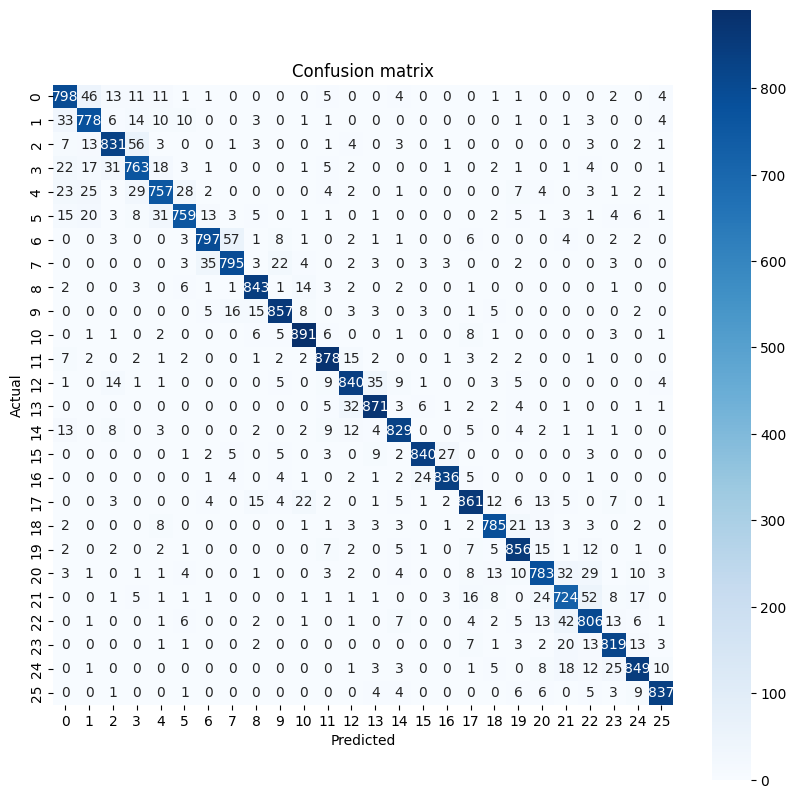

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()
     

In [12]:
from keras.preprocessing import image

# Load and preprocess the image
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims / 255.0



In [14]:
from tabulate import tabulate

def process_and_predict_image(image_path, classifier, actual_class):
    # Load the image
    img = prepare_image(image_path)
    # Reshape the image to flatten it
    img = img.reshape(img.shape[0], -1)
    # Predict the class of the image using the trained classifier
    img_pred = classifier.predict(img)
    # Convert number prediction to letter
    img_pred = number_to_letter[img_pred[0]]  # Adjust index based on the format of your prediction
    # Return the predicted class and actual class
    return img_pred, actual_class

# Mapping of numbers to their corresponding letters
number_to_letter = {i: chr(65 + i) for i in range(26)}

# Define list of images with their actual classes
images = [
    ('./OurAlphabet/A.jpg', 'A'),
    ('./OurAlphabet/K.jpg', 'K'),
    ('./OurAlphabet/U.jpg', 'U'),
    ('./OurAlphabet/W.jpg', 'W'),
    ('./OurAlphabet/Z.jpg', 'Z')
]

results = []
for image_path, actual_class in images:
    img_pred, actual_class = process_and_predict_image(image_path, logisticRegr, actual_class)
    results.append([actual_class, img_pred])

print(tabulate(results, headers=["Actual Class", "Predicted Class"], tablefmt='pretty'))

print("\nWorst quality test pictures:")

test_images_directory = "data/asl_alphabet_test/asl_alphabet_test/"
test_results = []
for file in os.listdir(test_images_directory):
    image_path = os.path.join(test_images_directory, file)
    actual_class = file[0]
    img_pred, actual_class = process_and_predict_image(image_path, logisticRegr, actual_class)
    test_results.append([actual_class, img_pred])

print(tabulate(test_results, headers=["Actual Class", "Predicted Class"], tablefmt='pretty'))


+--------------+-----------------+
| Actual Class | Predicted Class |
+--------------+-----------------+
|      A       |        D        |
|      K       |        C        |
|      U       |        C        |
|      W       |        C        |
|      Z       |        C        |
+--------------+-----------------+

Worst quality test pictures:
+--------------+-----------------+
| Actual Class | Predicted Class |
+--------------+-----------------+
|      F       |        F        |
|      G       |        G        |
|      L       |        L        |
|      M       |        S        |
|      R       |        R        |
|      S       |        S        |
|      X       |        X        |
|      Y       |        X        |
|      U       |        U        |
|      T       |        T        |
|      A       |        A        |
|      K       |        K        |
|      J       |        J        |
|      Z       |        W        |
|      n       |        D        |
|      Q       |        Q